In [406]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy import stats
# sns.set()
from collections import Counter

# Осмотр уникальных данных таблицы на наличие ошибок в заполнении


def watch_unique(data):
    for col in list(data.columns):
        print(col, data[col].unique(), sep='\n')


# Проверяем количество пустых занчений в строках


def rows_None(data):
    None_counter = {}
    for x in data.index:
        for value in data.loc[x]:
            if value == None or value == 'nan' or pd.isnull(value):
                None_counter.setdefault(x, 0)
                None_counter[x] += 1
    None_data_rows = pd.Series(None_counter)
    return None_data_rows.sort_values()

# Строим боксплоты


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# Цель проекта
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [407]:
# Загрузка данных
stud = pd.read_csv('stud_math.csv')

Проверяем обьем и состав данных.

In [408]:
print('Таблица содержит {} строк и {} колонок'.format(
    stud.shape[0], stud.shape[1]), ' ', sep='\n')
display(stud.head(10).T)
print(stud.info())

Таблица содержит 395 строк и 30 колонок
 


,0,1,2,3,4,5,6,7,8,9
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP
sex,F,F,F,F,F,M,M,F,M,M
age,18,17,15,15,16,16,16,17,15,15
address,U,U,U,U,U,U,NaN,U,U,U
famsize,NaN,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,NaN
Pstatus,A,NaN,T,T,T,T,T,A,A,NaN
Medu,4,1,1,4,3,4,2,4,3,3
Fedu,4,1,1,2,3,3,2,4,2,4
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other
Fjob,teacher,other,other,NaN,other,other,other,teacher,other,other


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Заменим тип данных для age на float для удобства.

In [409]:
stud['age'] = stud.age.astype('float64')

Посмотрим на уникальные значения в столбцах

In [410]:
watch_unique(stud)

school
['GP' 'MS']
sex
['F' 'M']
age
[18. 17. 15. 16. 19. 22. 20. 21.]
address
['U' nan 'R']
famsize
[nan 'GT3' 'LE3']
Pstatus
['A' nan 'T']
Medu
[ 4.  1.  3.  2. nan  0.]
Fedu
[ 4.  1.  2.  3. 40. nan  0.]
Mjob
['at_home' 'health' 'other' 'services' 'teacher' nan]
Fjob
['teacher' 'other' nan 'health' 'services' 'at_home']
reason
['course' 'other' 'home' 'reputation' nan]
guardian
['mother' 'father' 'other' nan]
traveltime
[ 2.  1.  3. nan  4.]
studytime
[ 2.  3.  1. nan  4.]
failures
[ 0.  3. nan  2.  1.]
schoolsup
['yes' 'no' nan]
famsup
['no' 'yes' nan]
paid
['no' nan 'yes']
activities
['no' 'yes' nan]
nursery
['yes' 'no' nan]
studytime, granular
[ -6.  -9.  -3.  nan -12.]
higher
['yes' nan 'no']
internet
[nan 'yes' 'no']
romantic
['no' nan 'yes']
famrel
[ 4.  5.  3. nan -1.  2.  1.]
freetime
[ 3.  2.  4.  1.  5. nan]
goout
[ 4.  3.  2.  1.  5. nan]
health
[ 3.  5.  1.  2.  4. nan]
absences
[  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  

В данных есть опечатка в столбце Fedu. Столбец studytime, granular заполнен некорректно. Большенство столбцов имеют пропуски. В столбце score есть нулвые значения.

Удалим строчку с опечаткой в столбце Fedu

In [411]:
stud.drop(stud[stud.Fedu == 40].index, inplace=True)

Удалим колонку studytime, granular так данные в ней не соответствуют описанию датасета.

In [412]:
stud.drop(columns='studytime, granular', inplace=True)

Удаляем строки с пропущенными и нулевыми значениями в колонке score

In [413]:
stud = stud[~stud.score.isnull()]
stud = stud[stud.score != 0]

Отфильтруем выбросы в колонке absences используя формулу интерквартильного расстояния.

In [414]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

Заменим пропуски на None

In [415]:
def f1(x): return None if pd.isnull(x) else None if str.lower(
    x) == 'nan' else None if x.strip == '' else x.strip()


def f2(x): return None if pd.isnull(
    x) else None if x == 'nan' else None if x == 'NaN' else None if np.isnan(x) else x


for col in stud.columns:
    if pd.DataFrame(stud[col]).dtypes[0] == 'object':
        stud[col] = stud[col].apply(f1)
    else:
        stud[col] = stud[col].apply(f2)

Проверим количество пропущенных данных в столбцах в процентах

In [416]:
print(stud.isna().sum())
print('В процентах', end='\n')
print(stud.isna().sum()/stud.shape[0]*100)
print('В среднем столбцы заполнены на ',
      (100 - stud.isna().sum()/stud.shape[0]*100).mean())

school         0
sex            0
age            0
address       13
famsize       18
Pstatus       32
Medu           2
Fedu          19
Mjob          14
Fjob          28
reason        15
guardian      28
traveltime    22
studytime      5
failures      17
schoolsup      9
famsup        30
paid          33
activities    12
nursery       12
higher        16
internet      26
romantic      28
famrel        21
freetime       5
goout          5
health        13
absences       0
score          0
dtype: int64
В процентах
school         0.000000
sex            0.000000
age            0.000000
address        4.140127
famsize        5.732484
Pstatus       10.191083
Medu           0.636943
Fedu           6.050955
Mjob           4.458599
Fjob           8.917197
reason         4.777070
guardian       8.917197
traveltime     7.006369
studytime      1.592357
failures       5.414013
schoolsup      2.866242
famsup         9.554140
paid          10.509554
activities     3.821656
nursery        3.821656
hi

Колчество пропушенных данных в строках.

In [423]:
print('Количество данных с пропущеными ячейками от 1 до 5 в строке ')
print(rows_None(stud).value_counts())
print('В процентах ')
print((rows_None(stud)/stud.shape[1]*100).value_counts())

Количество данных с пропущеными ячейками от 1 до 5 в строке 
1    103
2     80
3     32
4     11
5      4
dtype: int64
В процентах 
3.448276     103
6.896552      80
10.344828     32
13.793103     11
17.241379      4
dtype: int64


Среди строк с пропущенными данными большенство заполнены на 90-97%

Все данные в таблице можно поделить на номинальные и ранговые. Исключением будет только колонка с количеством пропущенных дней absences

In [424]:
grouped = stud.groupby(stud.dtypes, axis=1)
object_list = []
float_list = []
stud_float_int = pd.DataFrame()
stud_object = pd.DataFrame()
for x, y in grouped:
    if x == 'float':
        studs_float = y
        studs_float.drop(columns='absences', inplace=True)
        float_list = studs_float.columns
    else:
        stud_object = y
        object_list = stud_object.columns

In [425]:
print(object_list, len(object_list))
print(float_list, len(float_list))
stud_object = stud_object.join(stud.score)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object') 17
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'health', 'score'],
      dtype='object') 11


Проверим есть ли зависимость колонки absences и score построив график.

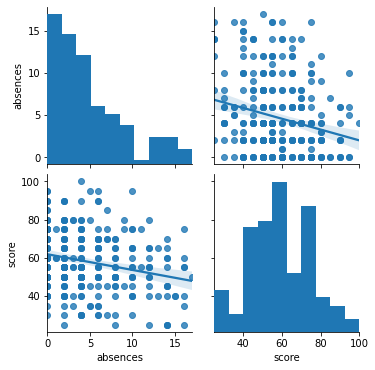

In [426]:
sns.pairplot(stud, vars=['absences', 'score'], kind='reg')

Из графика видно что чем меньше пропущенных дней тем выше оценка

Посмотрим на корреляцию absences и score

In [427]:
stud[['absences', 'score']].corr()

,absences,score
absences,1.00000,-0.22958
score,-0.22958,1.00000


Исходя из полученного графика зависимости и отрицательной корреляции между absences и score мы оставим эту переменную в датасете для дальнейшего построения модели.

# Проверим номинальные переменные

Проверим различаются ли распределения score в зависимости от значения этих переменных с помощью box-plot.

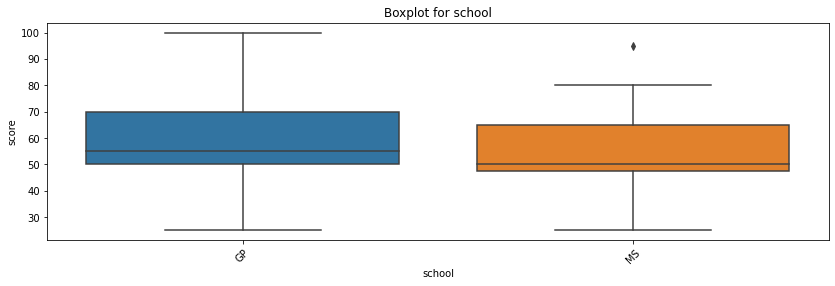

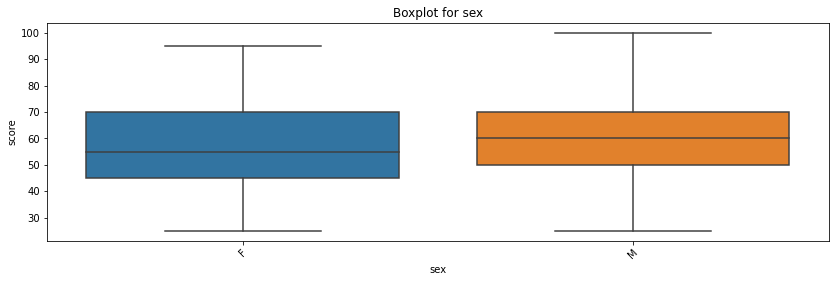

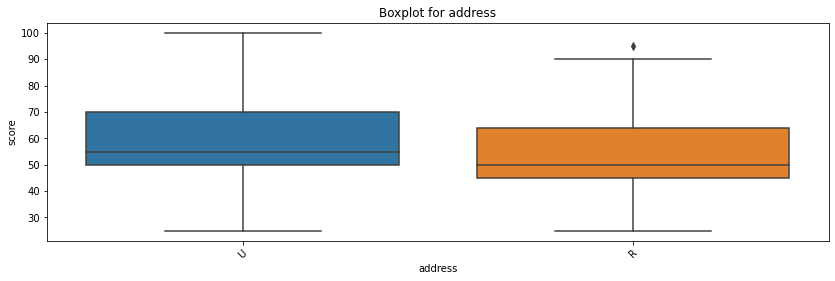

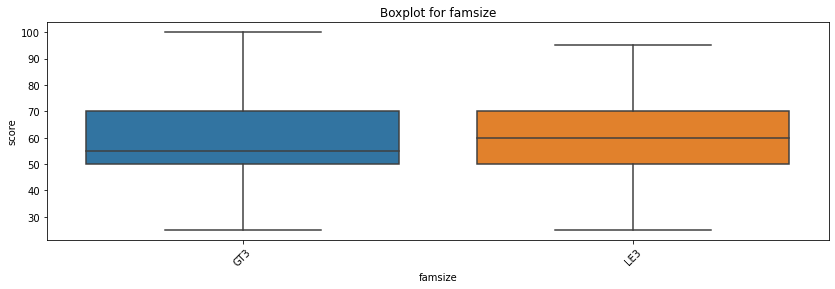

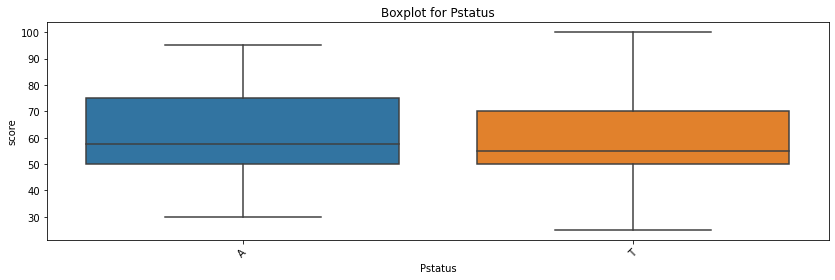

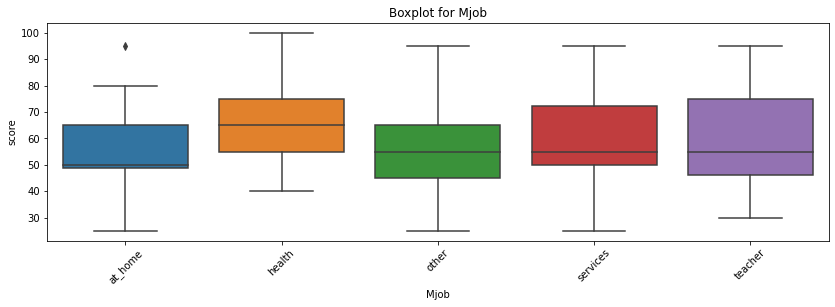

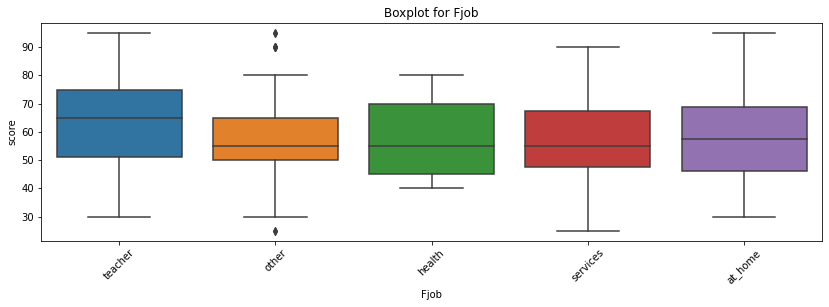

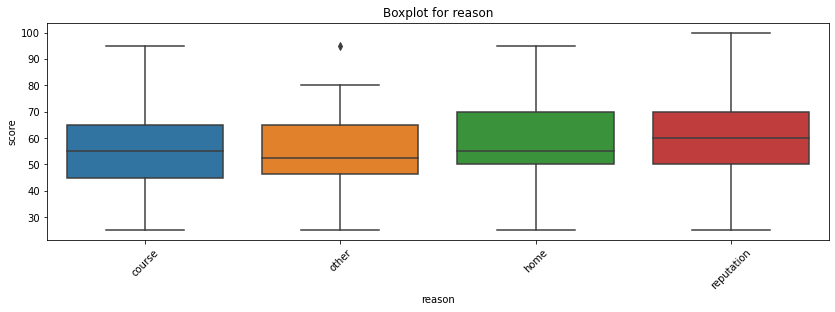

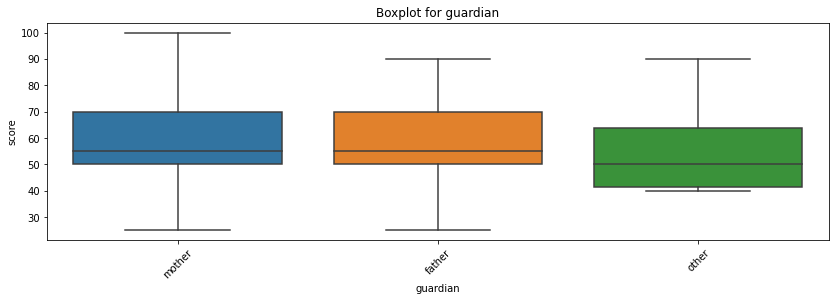

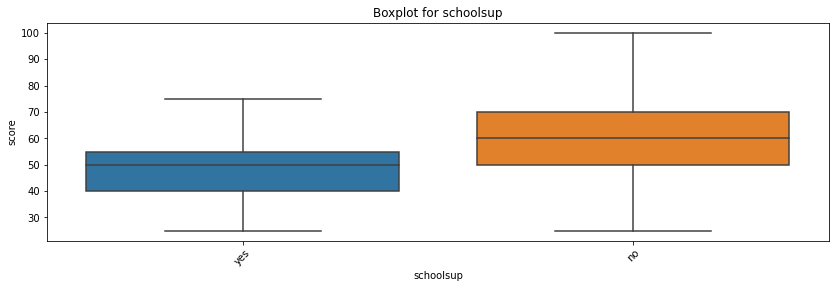

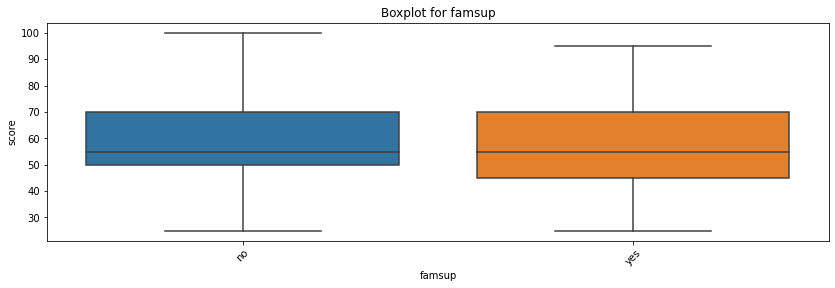

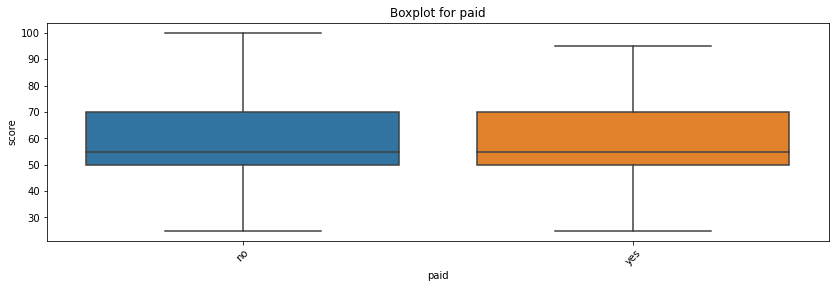

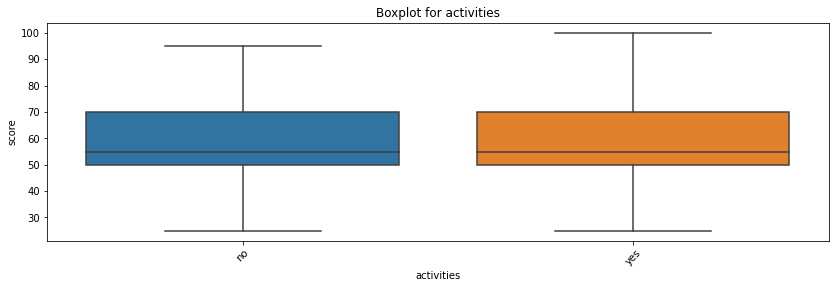

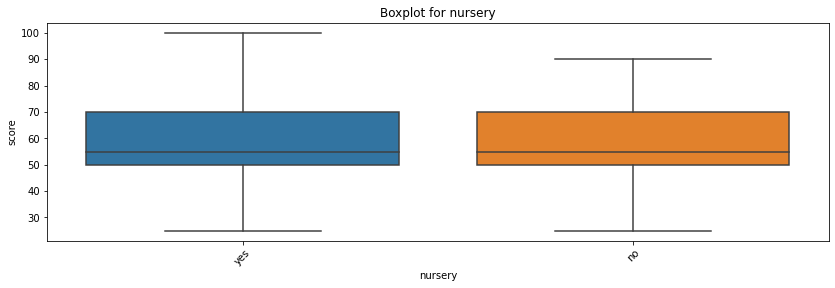

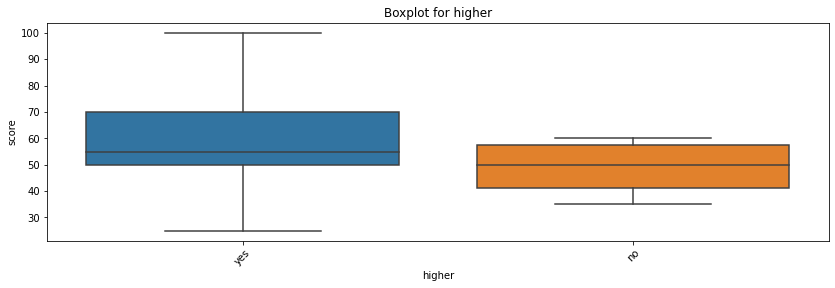

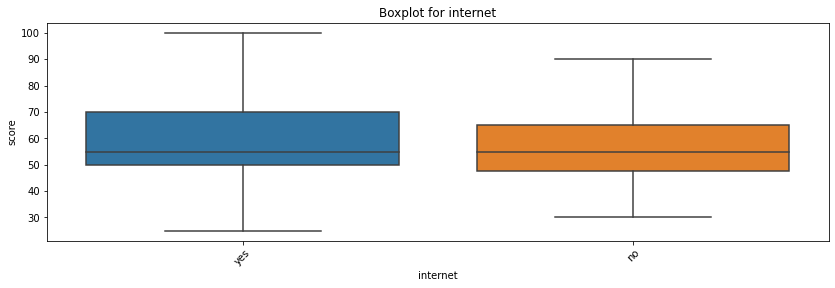

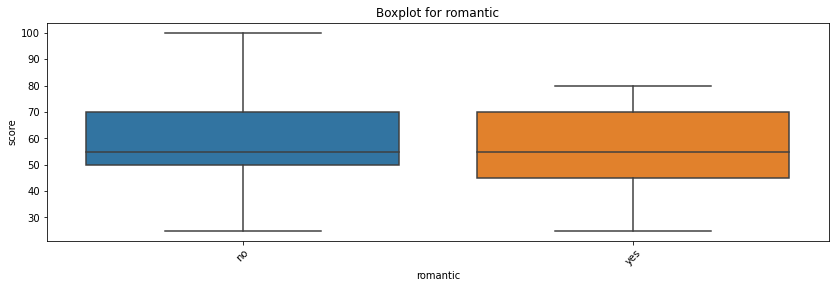

In [561]:
for col in object_list:
    get_boxplot(col)

Минимально влияют на score параметры: famsup, paid, activities, nursery.

Проверим как изменяется средние значение score в зависимости от значения номинальных переменных.

In [388]:
for col in object_list:
    print(stud.groupby(col)['score'].mean())

school
GP    58.472727
MS    54.871795
Name: score, dtype: float64
sex
F    56.118012
M    60.032680
Name: score, dtype: float64
address
R    53.181818
U    59.255319
Name: score, dtype: float64
famsize
GT3    57.705314
LE3    59.382022
Name: score, dtype: float64
Pstatus
A    60.892857
T    57.657480
Name: score, dtype: float64
Mjob
at_home     53.977273
health      64.655172
other       55.490196
services    59.620253
teacher     60.217391
Name: score, dtype: float64
Fjob
at_home     59.285714
health      58.461538
other       56.740506
services    57.025316
teacher     62.954545
Name: score, dtype: float64
reason
course        56.409091
home          58.815789
other         55.500000
reputation    60.481928
Name: score, dtype: float64
guardian
father    58.356164
mother    58.517588
other     54.642857
Name: score, dtype: float64
schoolsup
no     60.057252
yes    47.558140
Name: score, dtype: float64
famsup
no     58.909091
yes    57.126437
Name: score, dtype: float64
paid
no     58

Минимальное различие между средними значениями score  показывают колонки: famsup, paid, activities.

Попробуем восстановить данные, сравнив категорийные переменные состоящие из 2-х значений. Оставим только те варианты где один признак полностью соответсвует другому.

In [428]:
for name in object_list:
    for name2 in object_list:
        if stud[name].unique()[0] in ['no', 'yes'] and name != name2 and len(stud[name2].unique()) <= 3:
            if len(stud.groupby(name)[name2].value_counts()) < 4:
                print(stud.groupby(name)[name2].value_counts())

schoolsup  school
no         GP        225
           MS         37
yes        GP         43
Name: school, dtype: int64
paid  higher
no    yes       134
      no          8
yes   yes       124
Name: higher, dtype: int64
higher  Pstatus
no      T            9
yes     T          232
        A           28
Name: Pstatus, dtype: int64
higher  paid
no      no        8
yes     no      134
        yes     124
Name: paid, dtype: int64


Из полученных данных видно: 
- школа GP всем ученикам предоставляют schoolsup, значит можно заполнить пропущенные значения в schoolsup по этому признаку.
- все кто имеет дополнительные платные занятия по математике (paid = yes) хочет получить высшее образование (higher = yes), значит можно заполнить пропущенные значения в higher по этому признаку.



In [429]:
stud.loc[((stud['schoolsup'].isnull()) & (
    stud['school'] == 'GP')), 'schoolsup'] = 'yes'
stud.loc[((stud['higher'].isnull()) & (
    stud['paid'] == 'yes')), 'higher'] = 'yes'

print('Осталось пустых значений higher ', stud['higher'].isnull().sum())
print('Осталось пустых значений schoolsup ', stud['schoolsup'].isnull().sum())

Осталось пустых значений higher  10
Осталось пустых значений schoolsup  2


Попробуем восстановить данные, сравнив ранговые числовые переменные и возраст с категорийными состоящими из 2-х значений. Оставим только те варианты где один признак полностью соответсвует другому.

In [430]:
for name in float_list:
    for name2 in object_list:
        if len(stud[name2].unique()) <= 3 and name != name2 and name != 'score':
            if stud.groupby(name)[name2].value_counts().unstack().isnull().sum().sum() > 0:
                print(stud.groupby(name)[name2].value_counts())

age   school
15.0  GP        72
16.0  GP        87
17.0  GP        66
      MS        11
18.0  GP        41
      MS        23
19.0  GP         7
      MS         3
20.0  GP         1
      MS         1
21.0  MS         1
22.0  GP         1
Name: school, dtype: int64
age   sex
15.0  M      42
      F      30
16.0  F      46
      M      41
17.0  F      46
      M      31
18.0  F      32
      M      32
19.0  F       6
      M       4
20.0  F       1
      M       1
21.0  M       1
22.0  M       1
Name: sex, dtype: int64
age   address
15.0  U          58
      R          12
16.0  U          74
      R           9
17.0  U          54
      R          19
18.0  U          40
      R          22
19.0  U           7
      R           3
20.0  U           1
21.0  R           1
22.0  U           1
Name: address, dtype: int64
age   famsize
15.0  GT3        47
      LE3        20
16.0  GT3        60
      LE3        23
17.0  GT3        54
      LE3        20
18.0  GT3        35
      LE3        2

goout  higher
1.0    yes        15
       no          1
2.0    yes        77
       no          2
3.0    yes       101
       no          3
4.0    yes        63
5.0    yes        33
       no          4
Name: higher, dtype: int64


Из полученных данных видно: 
- schoolsup не оказывается ученикам старше 19 лет, значит можно заполнить пропущенные значения в schoolsup по этому признаку.
- ученики чьи родители имеют высшее образования так же хотят получить высшее обращование, значит можно заполнить пропущенные значения в higher по этому признаку.
- ученики у которых минимум сводобного времени и которые уделяют учебе максимум времени так же хотят получить высшее образование.

In [431]:
stud.loc[((stud['schoolsup'].isnull()) & (
    stud['age'] >= 19)), 'schoolsup'] = 'no'
stud.loc[((stud['higher'].isnull()) & (stud['Medu'] == 4.0)), 'higher'] = 'yes'
stud.loc[((stud['higher'].isnull()) & (stud['Fedu'] == 4.0)), 'higher'] = 'yes'
stud.loc[((stud['higher'].isnull()) & (
    stud['studytime'] == 4.0)), 'higher'] = 'yes'
stud.loc[((stud['higher'].isnull()) & (
    stud['freetime'] == 1.0)), 'higher'] = 'yes'

print('Осталось пустых значений schoolsup ', stud['schoolsup'].isnull().sum())
print('Осталось пустых значений higher ', stud['higher'].isnull().sum())

Осталось пустых значений schoolsup  0
Осталось пустых значений higher  7


Попробуем восстановить данные, сравнив категорийные переменные в которых значения отличные от yes/no и их больше двух с категорийными состоящими из 2-х значений. Оставим только те варианты где один признак полностью соответсвует другому.

In [405]:
for name in object_list:
    for name2 in object_list:
        if stud[name].unique()[0] not in ['no', 'yes'] and name != name2 and len(stud[name2].unique()) <= 3 and len(stud[name].unique()) > 3:
            if stud.groupby(name)[name2].value_counts().unstack().isnull().sum().sum() > 0:
                print(stud.groupby(name)[name2].value_counts())

Mjob      higher
at_home   yes       39
          no         4
health    yes       29
other     yes       97
          no         2
services  yes       73
          no         3
teacher   yes       46
Name: higher, dtype: int64
Fjob      school
at_home   GP         11
          MS          3
health    GP         13
other     GP        143
          MS         15
services  GP         65
          MS         14
teacher   GP         20
          MS          2
Name: school, dtype: int64
Fjob      higher
at_home   yes        14
health    yes        13
other     yes       150
          no          4
services  yes        71
          no          6
teacher   yes        22
Name: higher, dtype: int64
reason      higher
course      yes       101
            no          5
home        yes        74
            no          1
other       yes        25
            no          4
reputation  yes        83
Name: higher, dtype: int64


Из полученных данных видно что все ученики чьи родители работаю учтелями хотят получить высшее обращование.
И все ученики, которые выбрали школу по причине ее репутации так же хотят получить высшее образование.

In [432]:
stud.loc[((stud['higher'].isnull()) & (
    stud['reason'] == 'reputation')), 'higher'] = 'yes'
stud.loc[((stud['higher'].isnull()) & (
    stud['Mjob'] == 'teacher')), 'higher'] = 'yes'
stud.loc[((stud['higher'].isnull()) & (
    stud['Fjob'] == 'teacher')), 'higher'] = 'yes'
print('Осталось пустых значений higher ', stud['higher'].isnull().sum())

Осталось пустых значений higher  7


Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.

In [433]:
def get_stat_dif(column):
    combinations_all = list(combinations(stud[column].value_counts().index, 2))
#     print(combinations_all)
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for column in object_list:
    get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


Как мы видим, серьёзно отличаются параметры: sex, address, Mjob и schoolsup. Оставим эти переменные в датасете для дальнейшего построения модели.

# Проверим ранговые переменные

Построим графики зависимости переменных.

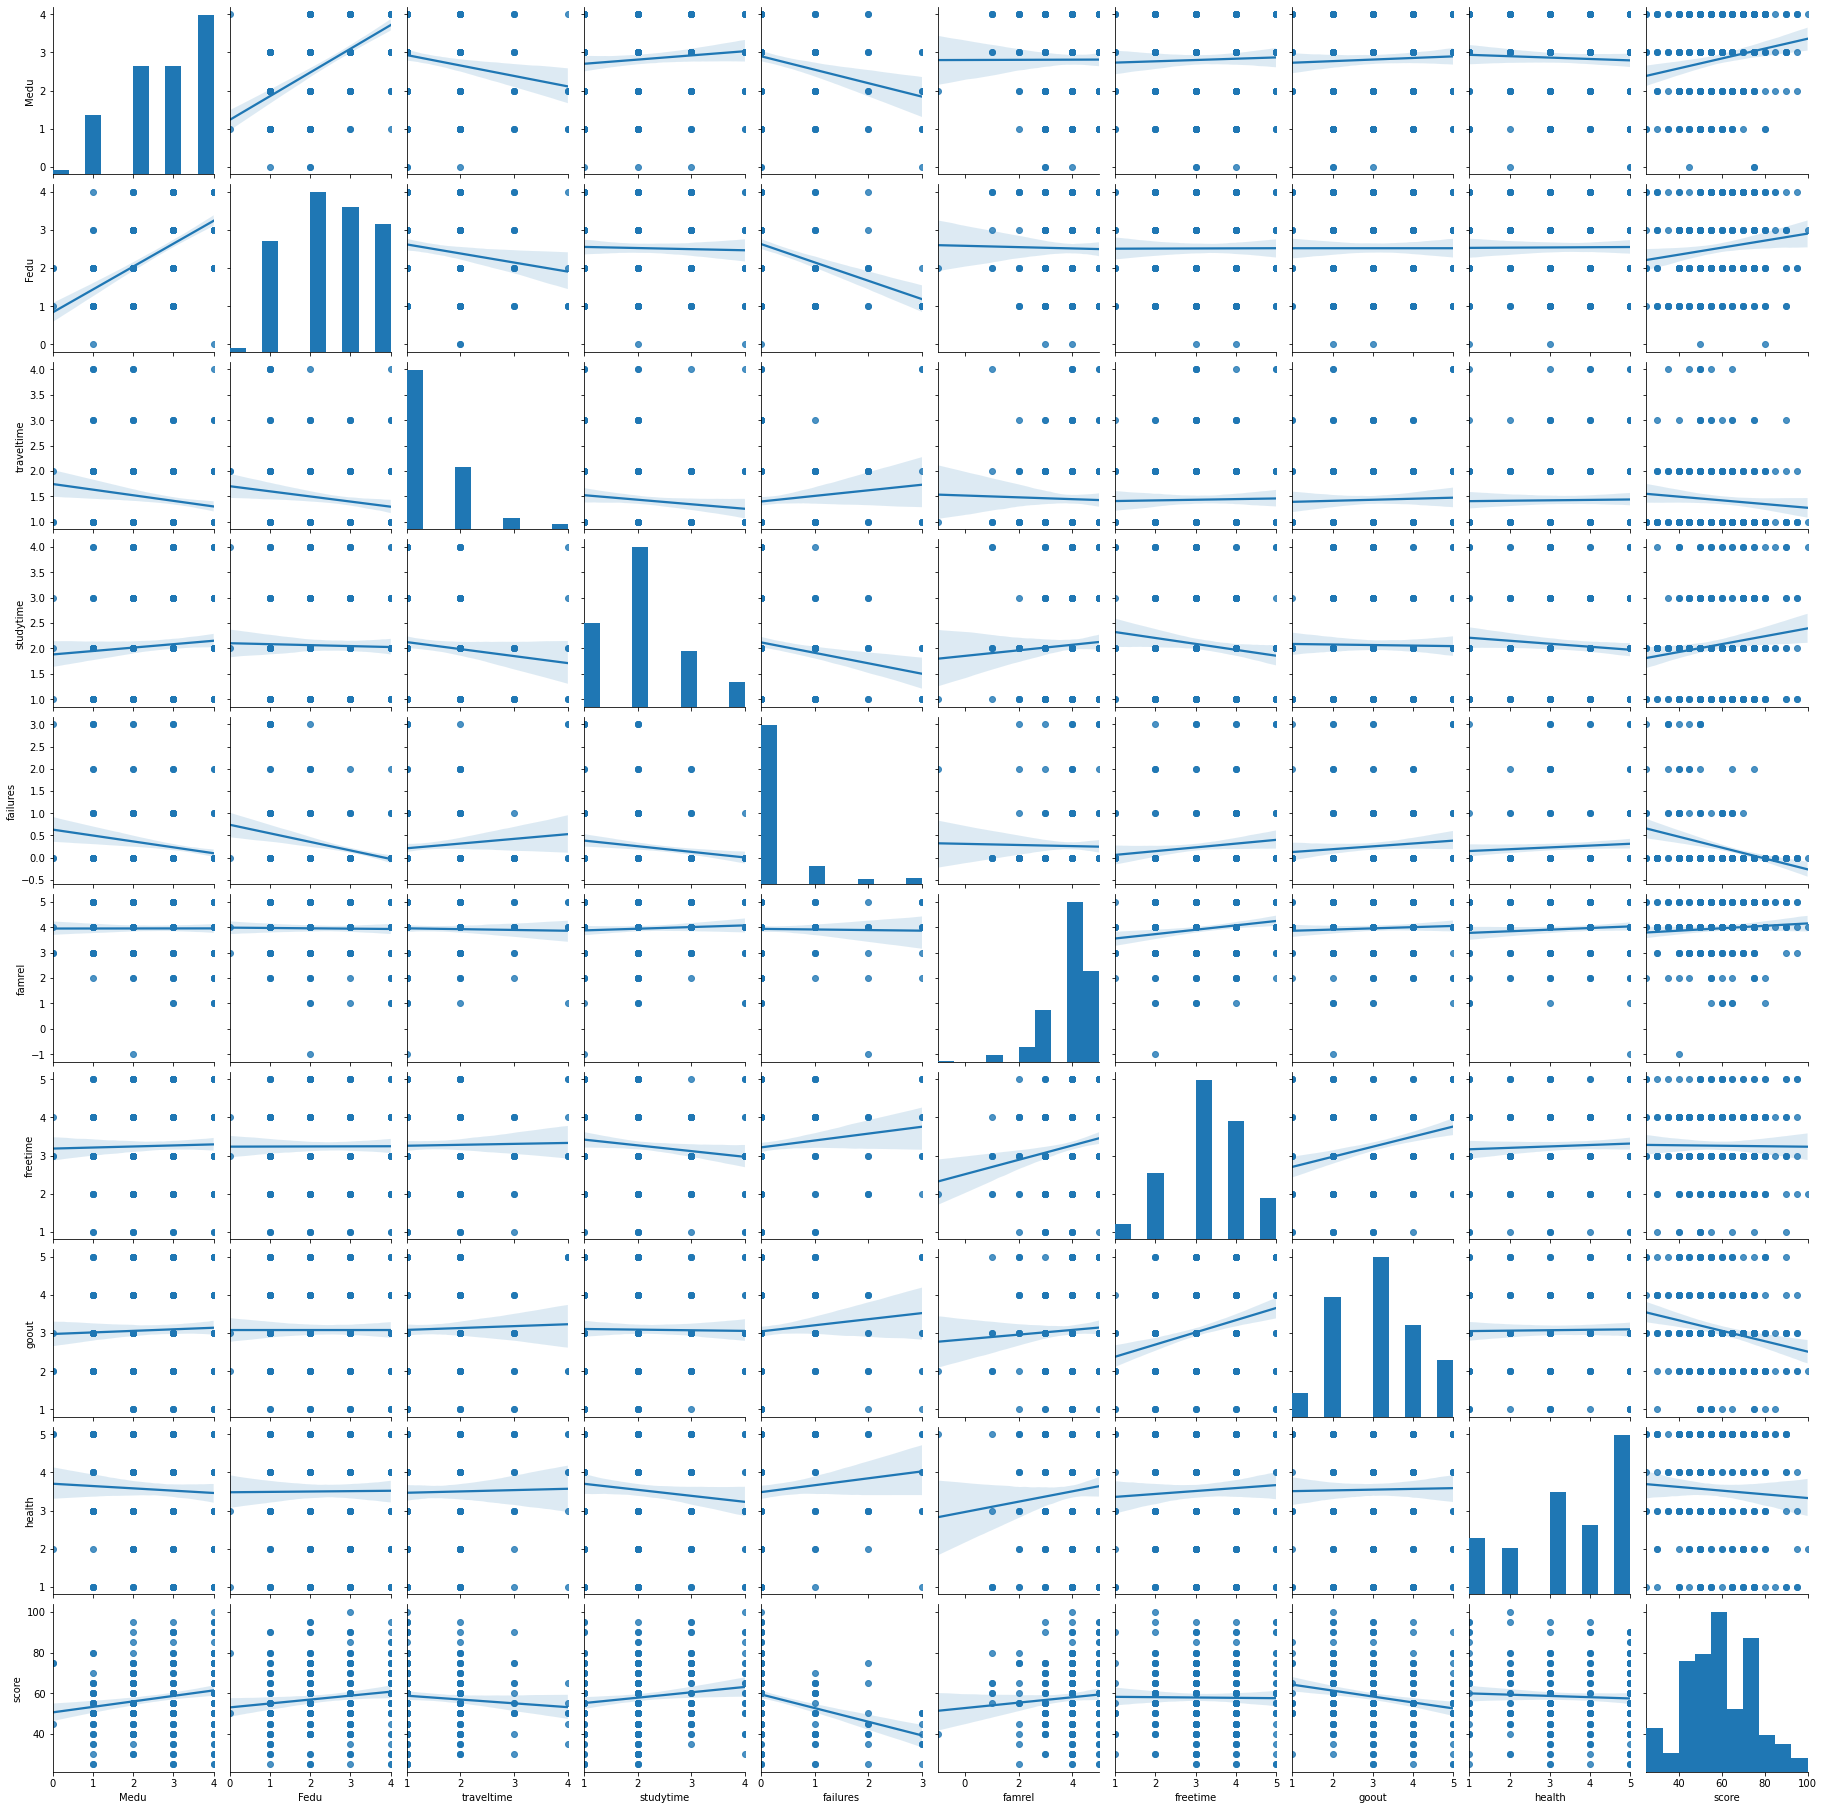

In [578]:
sns.pairplot(stud, vars=float_list, kind='reg')

Судя по графикам можно сказать что есть зависимость значения score от большенства переменных кроме Health и freetime.

Так как наши переменные ранговые мы можем построить матрицу корреляции Спирмана

In [580]:
stud[float_list].corr(method='spearman')

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,score
Medu,1.000000,0.621697,-0.152247,0.091529,-0.204306,0.027442,0.033142,0.042922,-0.040999,0.194705
Fedu,0.621697,1.000000,-0.139257,0.004883,-0.295671,0.004295,0.001158,0.014152,0.007749,0.153996
traveltime,-0.152247,-0.139257,1.000000,-0.114310,0.085700,-0.044862,0.019404,-0.014289,-0.009826,-0.081464
studytime,0.091529,0.004883,-0.114310,1.000000,-0.150186,0.068217,-0.115169,-0.016794,-0.112415,0.121966
failures,-0.204306,-0.295671,0.085700,-0.150186,1.000000,0.005286,0.140843,0.112529,0.129536,-0.294857
famrel,0.027442,0.004295,-0.044862,0.068217,0.005286,1.000000,0.177402,0.053268,0.081274,0.094316
freetime,0.033142,0.001158,0.019404,-0.115169,0.140843,0.177402,1.000000,0.286151,0.068642,-0.017810
goout,0.042922,0.014152,-0.014289,-0.016794,0.112529,0.053268,0.286151,1.000000,0.010121,-0.204553
health,-0.040999,0.007749,-0.009826,-0.112415,0.129536,0.081274,0.068642,0.010121,1.000000,-0.019932
score,0.194705,0.153996,-0.081464,0.121966,-0.294857,0.094316,-0.017810,-0.204553,-0.019932,1.000000


В матрице мы видим что переменные traveltime, famrel, freetime, health слабоскоррелированные с score.

Проверим, есть ли статистическая разница в распределении оценок по ранговым признакам, с помощью теста Спирмана.

In [434]:
def get_stat_dif_2(column):
    if column != 'score':
        # Учли поправку Бонферони
        if stats.spearmanr(stud[column], stud['score'], nan_policy='omit').pvalue <= 0.1:
            print('Найдены статистически значимые различия для колонки', column)


for column in float_list:
    get_stat_dif_2(column)

Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


Как мы видим, серьёзно отличаются параметры: age, Medu, Fedu, studytime, failures и goout. Оставим эти переменные в датасете для дальнейшего построения модели.

In [400]:
stud_for_model = stud[['age', 'sex', 'address', 'Mjob', 'schoolsup',
                       'Medu', 'Fedu', 'studytime', 'failures', 'goout', 'absences', 'score']]
stud_for_model.head().T

,0,1,2,3,4
age,18,17,15,15,16
sex,F,F,F,F,F
address,U,U,U,U,U
Mjob,at_home,at_home,at_home,health,other
schoolsup,yes,no,yes,no,no
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
studytime,2,2,2,3,2
failures,0,0,3,0,0
goout,4,3,2,2,2


# Выводы
 
 В результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, были получены следующие выводы:
 
 - В данных достаточно мало пустых значений, только столбец studytime, granular был заполнен некорректно.
 
 - Выбросы найдены только в столбце absences. Ими были студенты которые пропустили почти год обучения.
 
 - Получилось восстановить часть данных признаки которых полностью соответствуют друг другу.
 
 - Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, sex, address, Mjob, schoolsup, Medu, Fedu, studytime, failures, goout, absences.